# Jupter Notebook for A7 Part A

#### Chongyi Xu, CSE415 Fall 2017
#### UWNetID: chongyix

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
vectorizer = TfidfVectorizer()
vector_train = vectorizer.fit_transform(newsgroups_train.data)
newsgroups_test = fetch_20newsgroups(subset='test', categories=cata)
vector_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB()
clf.fit(vector_train, newsgroups_train.target)
y_pred = clf.predict(vector_test)
y_true = newsgroups_test.target
print(newsgroups_test.target_names)
cm = confusion_matrix(y_true, y_pred)

['rec.autos', 'sci.med']


|                                              |Predicted rec.autos |Predicted  sci.med|
|-------------------------------|--------------------|----------------------|
|rec.autos|395|1| 
|sci.med|15|381|

In [70]:
# Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# Plot the confusion matrix in a more readable way
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    

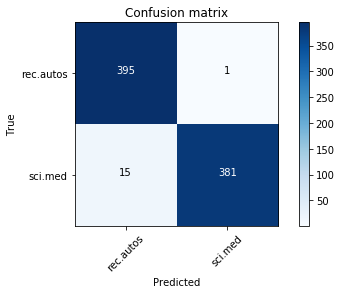

In [71]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cata,
                      title='Confusion matrix')
plt.show()